In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import io
import binascii

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('drive/MyDrive/Colab Notebooks/파이널프로젝트/data')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data'

In [ ]:
dir_list = os.listdir('Train')
dir_list

['[라벨]apple_fuji_M.zip',
 '[라벨]apple_yanggwang_S.zip',
 '[라벨]apple_yanggwang_M.zip',
 '[라벨]apple_fuji_S.zip',
 '[라벨]mandarine_onjumilgam_M.zip',
 '[라벨]mandarine_hallabong_S.zip',
 '[라벨]pear_chuhwang_S.zip',
 '[라벨]mandarine_onjumilgam_S.zip',
 '[라벨]mandarine_hallabong_M.zip',
 '[라벨]mandarine_hallabong_L.zip',
 '[라벨]apple_yanggwang_L.zip',
 '[라벨]mandarine_onjumilgam_L.zip',
 '[라벨]pear_singo_S.zip',
 '[라벨]persimmon_daebong_S.zip',
 '[라벨]persimmon_bansi_M.zip',
 '[라벨]persimmon_daebong_L.zip',
 '[라벨]persimmon_booyu_S.zip',
 '[라벨]pear_chuhwang_L.zip',
 '[라벨]persimmon_bansi_L.zip',
 '[라벨]persimmon_booyu_M.zip',
 '[라벨]persimmon_daebong_M.zip',
 '[라벨]persimmon_bansi_S.zip',
 '[라벨]persimmon_booyu_L.zip',
 '[라벨]pear_singo_M.zip',
 '[라벨]pear_singo_L.zip',
 '[라벨]pear_chuhwang_M.zip']

#1. JSON파일을 모두 읽고 CSV파일로 저장

In [ ]:
col_list = ['file_name', 'cate1', 'cate2', 'cate3', 'width', 'height', 'weight', 'fruit_name', 'xmin', 'ymin', 'xmax', 'ymax']
col_list

['file_name',
 'cate1',
 'cate2',
 'cate3',
 'width',
 'height',
 'weight',
 'fruit_name',
 'xmin',
 'ymin',
 'xmax',
 'ymax']

In [ ]:
folder_list = ['Train','Validation']
for folder_name in folder_list:
  dir_list = os.listdir(folder_name)
  df = pd.DataFrame(columns=col_list)
  max = len(dir_list)
  now = 0
  for dir in dir_list:
    print("전체 진행률 : ", round((now/max)*100), "%", sep="")
    now += 1
    
    fruit_name = dir[7:-6]
    print("DIR: ", dir)
    myzip = zipfile.ZipFile(folder_name+'/'+dir)
    json_list = myzip.namelist()

    json_max = len(json_list)
    json_now = 0
    for json_item in json_list:
      json_now += 1
      test_read = myzip.read(json_item)
      test_read = test_read.decode("utf8")
      test_read = test_read.replace("\n", "")
      test_read = test_read.replace(" ", "")
      test_dict = eval(test_read)
      pop_dict = test_dict.pop('bndbox')

      fruit_df = pd.DataFrame(test_dict, index=[0])
      fruit_df['fruit_name'] = fruit_name
      fruit_df['file_name'] = json_item[:-5]
      bndbox_df = pd.DataFrame(pop_dict, index=[0])
      merge_df = pd.concat([fruit_df, bndbox_df], axis=1)
      final_df = merge_df[col_list]
      df = pd.concat([df, final_df], axis=0)
    
  df = df.reset_index()
  df.to_csv('csvdata/'+folder_name+'.csv')

전체 진행률 : 0%
DIR:  [라벨]apple_fuji_M.zip
전체 진행률 : 4%
DIR:  [라벨]apple_yanggwang_S.zip
전체 진행률 : 8%
DIR:  [라벨]apple_yanggwang_M.zip
전체 진행률 : 12%
DIR:  [라벨]apple_fuji_S.zip
전체 진행률 : 15%
DIR:  [라벨]mandarine_onjumilgam_M.zip
전체 진행률 : 19%
DIR:  [라벨]mandarine_hallabong_S.zip
전체 진행률 : 23%
DIR:  [라벨]pear_chuhwang_S.zip
전체 진행률 : 27%
DIR:  [라벨]mandarine_onjumilgam_S.zip
전체 진행률 : 31%
DIR:  [라벨]mandarine_hallabong_M.zip
전체 진행률 : 35%
DIR:  [라벨]mandarine_hallabong_L.zip
전체 진행률 : 38%
DIR:  [라벨]apple_yanggwang_L.zip
전체 진행률 : 42%
DIR:  [라벨]mandarine_onjumilgam_L.zip
전체 진행률 : 46%
DIR:  [라벨]pear_singo_S.zip
전체 진행률 : 50%
DIR:  [라벨]persimmon_daebong_S.zip
전체 진행률 : 54%
DIR:  [라벨]persimmon_bansi_M.zip
전체 진행률 : 58%
DIR:  [라벨]persimmon_daebong_L.zip
전체 진행률 : 62%
DIR:  [라벨]persimmon_booyu_S.zip
전체 진행률 : 65%
DIR:  [라벨]pear_chuhwang_L.zip
전체 진행률 : 69%
DIR:  [라벨]persimmon_bansi_L.zip
전체 진행률 : 73%
DIR:  [라벨]persimmon_booyu_M.zip
전체 진행률 : 77%
DIR:  [라벨]persi

In [ ]:
df

,index,file_name,cate1,cate2,cate3,width,height,weight,fruit_name,xmin,ymin,xmax,ymax
0,0,apple_fuji_L_77-21_1TOP,사과,부사,특,9.0,9.3,380,apple_fuji,0,0,1000,1000
1,0,apple_fuji_L_77-22_2FR45,사과,부사,특,9.0,9.3,380,apple_fuji,0,0,1000,1000
2,0,apple_fuji_L_77-23_3FR90,사과,부사,특,9.0,9.3,380,apple_fuji,0,0,1000,1000
3,0,apple_fuji_L_77-24_4DI45,사과,부사,특,9.0,9.3,380,apple_fuji,0,0,1000,1000
4,0,apple_fuji_L_77-25_5DI90,사과,부사,특,9.0,9.3,380,apple_fuji,0,0,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7804,0,pear_singo_S_66-5_5DI90,배,신고,보통,10.2,8.5,500,pear_singo,0,0,1000,1000
7805,0,pear_singo_S_66-6_1TOP,배,신고,보통,10.2,8.5,500,pear_singo,0,0,1000,1000
7806,0,pear_singo_S_66-7_2FR45,배,신고,보통,10.2,8.5,500,pear_singo,0,0,1000,1000
7807,0,pear_singo_S_66-8_3FR90,배,신고,보통,10.2,8.5,500,pear_singo,0,0,1000,1000


In [ ]:
df = df.reset_index()

In [ ]:
df.iloc[0:,  -4:].describe()

,xmin,ymin,xmax,ymax
count,7809,7809,7809,7809
unique,1,1,1,1
top,0,0,1000,1000
freq,7809,7809,7809,7809


# np.array에서 image로 변경하는 방법

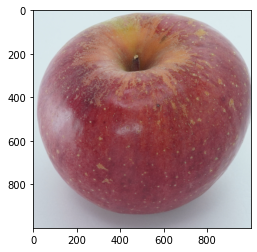

In [ ]:
reImage = Image.fromarray(imgArray)
plt.imshow(reImage)

# 리사이즈 하는방법

[[217 230 235 ... 236 218 232]
 [235 219 233 ... 233 236 219]
 [233 236 219 ... 219 233 236]
 ...
 [235 238 222 ... 218 232 236]
 [218 232 236 ... 235 218 232]
 [235 219 233 ... 146  99 182]]


(512, 512)

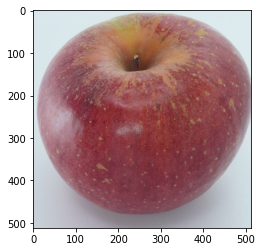

In [ ]:
resize_image = image.resize((512, 512))
plt.imshow(resize_image)
array = np.array(imgArray)
print(array)
array.shape

#FruitName, width, heigth, weight, cate3  DF만들기

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ori_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/OnlyLabelsmeta.csv')
ori_df.columns

Index(['index', 'file_name', 'cate1', 'cate2', 'cate3', 'width', 'height',
       'weight', 'fruit_name', 'xmin', 'ymin', 'xmax', 'ymax'],
      dtype='object')

In [8]:
df = ori_df[['fruit_name','width', 'height', 'weight', 'cate3']]
print(df.shape)
df.head()
df.to_csv('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/Fruit_names.csv')

(52137, 5)


In [13]:
df = df.drop_duplicates()

In [18]:
df.value_counts('fruit_name')

fruit_name
persimmon_bansi         165
persimmon_booyu         164
pear_chuhwang           143
pear_singo              139
persimmon_daebong       133
apple_yanggwang         130
mandarine_onjumilgam    119
apple_fuji              111
mandarine_hallabong     104
dtype: int64

##Fruit_Name (세부 버전)

In [22]:
fruit_list = list(df.value_counts('fruit_name').index)
fruit_list

['persimmon_bansi',
 'persimmon_booyu',
 'pear_chuhwang',
 'pear_singo',
 'persimmon_daebong',
 'apple_yanggwang',
 'mandarine_onjumilgam',
 'apple_fuji',
 'mandarine_hallabong']

In [25]:
PATH = '/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/Fruits_csv/'
for fruit in fruit_list:
  save_df = df[df['fruit_name'] == fruit]
  print(fruit)
  #print(save_df.iloc[0])
  save_df.to_csv(PATH+fruit+'.csv')

persimmon_bansi
persimmon_booyu
pear_chuhwang
pear_singo
persimmon_daebong
apple_yanggwang
mandarine_onjumilgam
apple_fuji
mandarine_hallabong


##Fruit_Name 과일별 버전

In [28]:
def getFruitName(file_name):
  return file_name.split('_')[0]

df['fruit'] = df['fruit_name'].apply(getFruitName)
df.head()

,fruit_name,width,height,weight,cate3,fruit
0,apple_fuji,8.6,7.5,290,상,apple
40,apple_fuji,9.5,7.5,295,상,apple
80,apple_fuji,8.8,7.2,270,상,apple
120,apple_fuji,8.6,7.1,275,상,apple
160,apple_fuji,8.1,7.1,265,상,apple


In [30]:
df = df[['fruit', 'width', 'height', 'weight', 'cate3']]

,fruit,width,height,weight,cate3
0,apple,8.6,7.5,290,상
40,apple,9.5,7.5,295,상
80,apple,8.8,7.2,270,상
120,apple,8.6,7.1,275,상
160,apple,8.1,7.1,265,상
...,...,...,...,...,...
51942,pear,8.6,8.8,455,상
51979,pear,10.0,9.2,485,상
52007,pear,9.3,8.6,470,상
52043,pear,9.8,8.4,455,상


In [33]:
fruit_list = list(df.value_counts('fruit').index)
fruit_list

['persimmon', 'pear', 'apple', 'mandarine']

In [34]:
PATH = '/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/Fruits_csv/'
for fruit in fruit_list:
  save_df = df[df['fruit'] == fruit]
  print(fruit)
  #print(save_df.iloc[0])
  save_df.to_csv(PATH+fruit+'.csv')

persimmon
pear
apple
mandarine
